# Zadanie 05 (a)
---
#### Rozwiąż równanie różniczkowe $$\frac{dy}{dx} = y - x^2$$ na przedziale $x \in <0,3>$ z warunkiem początkowym $y(0)=1$ korzystając z metod:
+ metody Eulera
+ metody Rungego-Kutty II rzędu
+ metody Rungego-Kutty IV rzędu

Porównaj zbierzność metod.

**Punktacja**
+ implemetacja metody Eulera **1p.**
+ implemetacja metody Rungego-Kutty II rzędu **1p.**
+ implemetacja metody Rungego-Kutty IV rzędu **1p.**
+ porównanie zbierzności metod **1p.**

## Teoria
---
$$ \frac{dy}{dx} = f(x,y)$$ $$ \int_{y_{i}}^{y_{i+1}} dy = \int_{x_{i}}^{x_{i+1}} f(x,y) dx$$ $$y_{i+1} = y_{i} + \int_{x_{i}}^{x_{i+1}} f(x,y) dx $$

### Metoda Eulera
$$\begin{array}{lcl} y_{i+1}&=&y_{i} + f(x_i,y_i)(x_{i+1}-x_i) \\ y_{i+1}&=&y_{i} + h ~ f(x_i,y_i) \end{array}$$

### Metoda Rungego-Kutty II rzędu
$$\begin{array}{lcl} K_{1} & = & f(x_i,y_i) \\ K_2 & = & f(x_i+h,y_i+ h K_{1}) \\ y_{i+1} & = & y_{i} + (K_1 + K_2)\frac{h}{2} \end{array}$$

### Metoda Rungego-Kutty IV rzędu
$$\begin{array}{lcl} K_{1} & = & f(x_i,y_i) \\ K_2 & = & f(x_i+\frac{h}{2},y_i+\frac{h}{2}K_{1}) \\ K_3 & = & f(x_i+\frac{h}{2},y_i+\frac{h}{2}K_{2}) \\ K_4 & = & f(x_i+h,y_i+hK_{3}) \\ y_{i+1} & = & y_{i} + \frac{h}{6}(K_1+2K_2+2K_3+K_4) \end{array}$$

## Wykonanie
---
Wczytanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Deklaracja funkcji oraz przedziału, w którym będzie rozwiązywane równanie

In [2]:
f  = lambda x,y: y - x*x
fa = lambda x: 2 + 2*x + x**2 - np.exp(x)

a = 0
b = 3

Implementacja funkcji realizującej metodę Eulera

In [115]:
def euler(func, a, b, N):
    
    X = np.linspace(a,b,N)
    Y = []
    h = (b-a)/N
    
    y=1
    y0=1
    
    for i in X:
        y0=y
        y= y0 + h*func(i,y0)
        Y.append(y0)
        
    
        
    return np.array(X), np.array(Y)

Sprawdzenie poprawności

In [116]:
Xe, Ye = euler(f,a,b,10) 
print(sum(abs(Ye - np.array(fa(Xe)))) < 5)
print(sum(abs(Ye - np.array(fa(Xe)))))

True
4.40372012954


Implementacja funkcji realizującej metodę Rungego-Kutty II rzędu

In [168]:
def rk2(func, a, b, N):
    
    X = np.linspace(a,b,N)
    h = (b-a)/N
    Y = []
    y = 1
    y0 = 1 
    
    for i in X:
        y0=y
        K1 = f(i,y0)
        K2 = f(i+h,y0+h*K1)
        y = y0+(h/2)*(K1+K2)
        Y.append(y0)
        
    return np.array(X), np.array(Y)

Sprawdzenie poprawności

In [169]:
Xrk2, Yrk2 = rk2(f,a,b,10) 
print(sum(abs(Yrk2 - np.array(fa(Xrk2)))) < 3)
print(sum(abs(Yrk2 - np.array(fa(Xrk2)))))

True
2.80665833157


Implementacja funkcji realizującej metodę Rungego-Kutty IV rzędu

In [172]:
def rk4(func, a, b, N):
    X = np.linspace(a,b,N)
    h = (b-a)/N
    Y = []
    y = 1
    y0 = 1 
    
    for i in X:
        y0 = y
        K1 = f(i,y0)
        K2 = f(i+h/2,y0+h/2*K1)
        K3 = f(i+h/2,y0+h/2*K2)
        K4 = f(i+h,y0+h*K3)
        
        y = y0+(h/6)*(K1+2*K2+2*K3+K4)
        Y.append(y0)
    
           
    return np.array(X), np.array(Y)

Sprawdzenie poprawności

In [173]:
Xrk4, Yrk4 = rk4(f,a,b,10) 
print(sum(abs(Yrk4 - np.array(fa(Xrk4)))) < 2.8)
print(sum(abs(Yrk4 - np.array(fa(Xrk4)))))

True
2.63141551317


Porównanie zbierzności metod

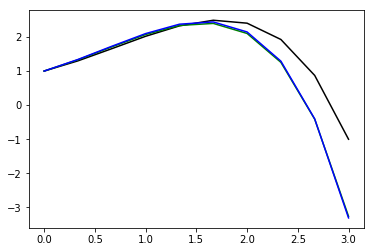

In [174]:
N=10
X = np.linspace(a,b,N)

Xe =[]
Ye =[]
Xrk2 = []
Xrk4 = []
Yrk2 = []
Yrk4 = []


Xe, Ye = euler(f, a, b, 10)
Xrk2, Yrk2 = rk2(f, a, b, 10)
Xrk4, Yrk4 = rk4(f, a, b, 10)
    
plt.plot(Xe,Ye, c='black')
plt.plot(Xrk2,Yrk2, c='green')
plt.plot(Xrk4, Yrk4, c='blue')
plt.show()